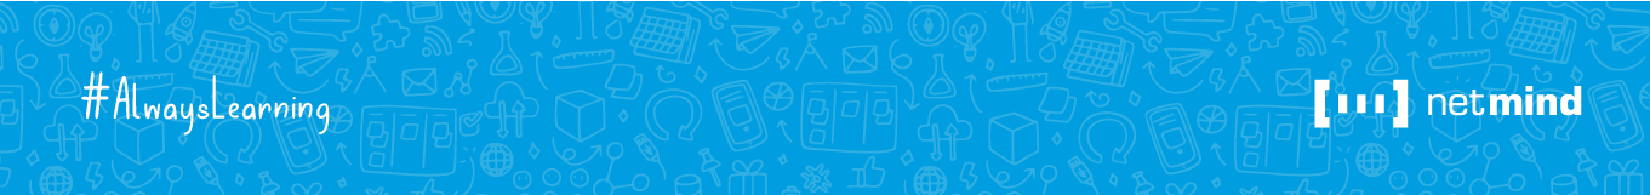
# Ejercicios Numpy

### Ejercicio 1. 
Crea arrays de 1, 2 y 3 dimensiones. Las longitudes deben ser las siguientes, respectivamente: 6, 3 x 2 y 2 x 3 x 4

In [2]:
# import numpy as np

In [ ]:
print(np.zeros(6))
print(np.zeros([3,2]))
print(np.zeros([2,3,4]))

### Ejercicio 2. 
Crea una función que te haga un resumen estadístico básico de un array (cuartiles, mediana, media, varianza, etc) si tiene una dimensión. Si tiene más de una, muestra un mensaje de alerta.

In [ ]:
def resumen_estadistico_basico(array):
    if array.ndim != 1:
        return "El array tiene más de una dimensión. Por favor, proporciona un array unidimensional."

    resumen = {
        "Media": np.mean(array),
        "Mediana": np.median(array),
        "Varianza": np.var(array),
        "Desviación Estándar": np.std(array),
        "Cuartil 1": np.percentile(array, 25),
        "Cuartil 2 (Mediana)": np.percentile(array, 50),
        "Cuartil 3": np.percentile(array, 75),
        "Mínimo": np.min(array),
        "Máximo": np.max(array),
    }

    return resumen


array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print(resumen_estadistico_basico(array))

array_multidimensional = np.array([[1, 2, 3], [4, 5, 6]])
print(resumen_estadistico_basico(array_multidimensional))

### Ejercicio 3. 
Crea un array de 3 dimensiones parecido al que te doy a continuación, y sin ejecutar las instrucciones siguientes, intenta razonar qué números devolverán (si funcionan, claro)


In [3]:
arr = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13, 14, 15],[16, 17, 18]], [[19, 20, 21],[22, 23, 24]] ])
arr

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24]]])

In [4]:
print(arr[-1,-1,-1])

24


In [5]:
print(arr[0,1,:])

[4 5 6]


In [6]:
print(arr[:,0,:])

[[ 1  2  3]
 [ 7  8  9]
 [13 14 15]
 [19 20 21]]


In [7]:
print(arr[:,:,-1])

[[ 3  6]
 [ 9 12]
 [15 18]
 [21 24]]


In [9]:
print(arr[1,2,3])

IndexError: index 2 is out of bounds for axis 1 with size 2

In [10]:
print(arr[2,1,0])

16


In [11]:
print(arr[::2,:,:])

[[[ 1  2  3]
  [ 4  5  6]]

 [[13 14 15]
  [16 17 18]]]


Investiga un poco más...

### Ejercicio 4. 
Crea un array de 3 x 3 que contenga valores aleatorios entre el 0 y el 100. Tendrás que usar el submódulo random. Una vez tengas el código, transfórmalo a una función que te permita crear arrays de tamaño N x N

In [13]:
from numpy import random

In [15]:
print(np.random.random([3,3])*100)

[[76.32707665 41.74976821 94.85963261]
 [62.32885268 35.02107403 81.78221381]
 [28.97742011 48.6248042   1.65350605]]


In [ ]:
def gen_random_n_x_n(n):
    return np.random.random([n, n])*100

print(gen_random_n_x_n(5))

### Ejercicio 5. 
Crea una función que dependa de un número. Si la función se ejecuta con el número 5, debe devolver el siguiente array:

1 1 1 1 1

1 0 0 0 1

1 0 0 0 1

1 0 0 0 1 

1 1 1 1 1

In [ ]:
arr1 = np.ones([5, 5])
arr2 = np.zeros([3, 3])
arr1[1:4, 1:4] = arr2
arr1

In [ ]:
def gen_cuadrado_1_0(n):
    if n==1: return 1
    arr1 = np.ones([n, n])
    arr2 = np.zeros([n-2, n-2])
    arr1[1:n-1, 1:n-1] = arr2
    return arr1

gen_cuadrado_1_0(2)

### Ejercicio 6. 
Crea una función que te detecte las dimensiones de un array, y te diga cuántos datos faltantes contiene. Crea unos datos de ejemplo para comprobarlo.

In [ ]:
arr = np.ones([3,3])
arr[1,1] = np.nan
arr[2,0] = np.nan
arr

In [ ]:
def dims_and_nans(arr):
    return {'dims': arr.ndim, 'faltan': int(sum(np.isnan(arr.flatten())))}


print(dims_and_nans(arr))

### Ejercicio 7. 
Crea una función que te calcule los márgenes de una tabla, es decir, la suma por columnas, la suma por filas y el total. Idealmente, añadelo a la tabla original

In [61]:
arr = np.array( [[3,2,1,2]  ,  
                 [6,7,9,5]] )


In [59]:
def calc_margenes(tabla):
    if tabla.ndim != 2: return "El array debe ser bidimensional."

    filas_suma = np.sum(tabla, axis=1).reshape(-1, 1)  # Suma por filas
    columnas_suma = np.sum(tabla, axis=0).reshape(1, -1)  # Suma por columnas
    total = np.sum(tabla)  # Suma total

    tabla_con_filas = np.hstack((tabla, filas_suma))

    margenes = np.hstack((columnas_suma, [[total]]))
    tabla_con_margenes = np.vstack((tabla_con_filas, margenes))

    return tabla_con_margenes

In [ ]:
calc_margenes(arr)

### Ejercicio 8.
Crea una función que dados dos arrays X e Y, te calcule el coeficiente de correlación entre ellos usando la siguiente fórmula

https://wikimedia.org/api/rest_v1/media/math/render/svg/2b9c2079a3ffc1aacd36201ea0a3fb2460dc226f

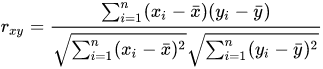

In [66]:
x = np.array([2,3,4,6,7,8,9,7])
y = np.array([5,6,8,5,10,8,9,5])

In [68]:
def coef_correlacion(X, Y):
    if X.ndim != 1 or Y.ndim != 1: return "Ambos arrays deben ser unidimensionales."
    if len(X) != len(Y): return "Ambos arrays deben tener la misma longitud."

    n = len(X)
    media_X = np.mean(X)
    media_Y = np.mean(Y)
    
    numerador = np.sum((X - media_X) * (Y - media_Y))
    denominador = np.sqrt(np.sum((X - media_X)**2) * np.sum((Y - media_Y)**2))

    if denominador == 0: return "No se puede calcular el coeficiente de correlación debido a división por cero."

    return float(numerador / denominador)

In [ ]:
coef_correlacion(x,y)

### Ejercicio *. 
Investiga un poco sobre las funcionalidades de Numpy que no hayamos visto en estas sesiones, y propón un ejercicio(s). Añádele una etiqueta con el nivel de dificultad para tus compañeros/as

© Netmind S.L.

Todos los derechos reservados. Este documento (v1.00) ha sido diseñado para el uso exclusivo del cliente que atiende a esta formación.

Ninguna parte de este documento puede ser reproducida, distribuida o transmitida en cualquier forma o por cualquier medio sin el permiso previo por escrito de Netmind.